In [1]:
import numpy as np
from math import e
import matplotlib.pyplot as plt
from ipywidgets import interact
from scipy.optimize import curve_fit
import pandas as pd
plt.style.reload_library()
plt.style.use(['science', 'grid'])
from scipy.odr import ODR, Model, Data, RealData
import scipy.optimize as opt; #allows for curve fitting
from scipy.odr import *

In [2]:
def Gaussian(x,a,b,c,d):
    return a*e**((-(x-b)**2)/(2*c**2))+d 
# a : Amplitude 
# b : Mean
# c : Standard Deviation
# d : Offset

def GaussianODR(B,x):
    return B[0]*e**((-(x-B[1])**2)/(2*B[2]**2))+B[3] 

def linear(x,a,b):
    return a*x + b

def GaussianFit(xdata, ydata, color, x_label, y_label, low_limit, up_limit, a_est, b_est, c_est, d_est):
    
    fig = plt.figure(figsize=(5, 5), dpi=80)
    plt.scatter(xdata, ydata, s=10, color='black')
    
    # Fit the dummy Gaussian data
    pars, cov = curve_fit(f=Gaussian, xdata=xdata, ydata=ydata, p0=[a_est, b_est, c_est, d_est], bounds=(-np.inf, np.inf))
    # Get the standard deviations of the parameters (square roots of the # diagonal of the covariance)
    stdevs = np.sqrt(np.diag(cov))
    
    # Plotting Gaussian
    x = np.linspace(low_limit, up_limit, 100)
    y = Gaussian(x, *pars)
    plt.plot(x,y, color=color)

    plt.xlabel(r'$\textit{'+ x_label +'}$', fontsize = 16)
    plt.ylabel(r'$\textit{'+ y_label +'}$', fontsize = 16)
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    #plt.xticks(np.arange(min(x), max(x)+.5, freq))
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    
    #VERTICAL LINE 
    #label = r'$\textit{(' + str("{:.2}".format(pars[1])) + '±' + str("{:.2e}".format(stdevs[1])) + ') nm}$'
    plt.axvline(x=pars[1], color='k', linestyle='--')
    #plt.legend(prop={'size': 12}, loc=2)
    plt.savefig("Figures/figure.png")
    
    print('Amplitude a = ', pars[0], ' ± ', stdevs[0])
    print('Mean Lambda = ', pars[1], ' ± ', stdevs[1])
    print('Standard Deviation sigma = ', pars[2], ' ± ', stdevs[2])
    
    return [(10**(-9))*pars[1], (10**(-9))*stdevs[1]]

def LinearPlot(xdata,ydata,error,a,b,title,function,x_label,y_label,color):
    fig = plt.figure(figsize=(5, 5), dpi=80)
    plt.errorbar(xdata,ydata,yerr=error,capsize = 5,marker = 'o',markersize=4, linestyle = 'None',color='black')
    if b==0:
        label = r'$\textit{Y = ' + str("{:.2e}".format(a)) + 'X}$'
    else:
        label = r'$\textit{Y = ' + str("{:.2e}".format(a)) + 'X + ' + str("{:.2e}".format(b)) + '}$'
    plt.plot(xdata,function(xdata,*parameters),label = label, color=color)
    plt.legend(loc = 'upper left')
    plt.xlabel(r'$\textit{'+ x_label +'}$', fontsize = 16)
    plt.ylabel(r'$\textit{'+ y_label +'}$', fontsize = 16)
    #plt.xticks(np.arange(min(xdata), max(xdata), (max(xdata)-min(xdata))/5))
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
    plt.legend(prop={'size': 12}, loc=1)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.savefig("Figures/figure.png")
    
def LinearPlot2(xdata,ydata,error,a,b,title,function,x_label,y_label,color):
    fig = plt.figure(figsize=(5, 5), dpi=80)
    plt.scatter(xdata,ydata, s=10,color='black')
    if b==0:
        label = r'$\textit{Y = ' + str("{:.2e}".format(a)) + 'X}$'
    else:
        label = r'$\textit{Y = ' + str("{:.2e}".format(a)) + 'X + ' + str("{:.2e}".format(b)) + '}$'
    plt.plot(xdata,function(xdata,*parameters),label = label, color=color)
    plt.xlabel(r'$\textit{'+ x_label +'}$', fontsize = 16)
    plt.ylabel(r'$\textit{'+ y_label +'}$', fontsize = 16)
    #plt.xticks(np.arange(min(xdata), max(xdata), (max(xdata)-min(xdata))/5))
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
    plt.legend(prop={'size': 12}, loc=2)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.savefig("Figures/figure.png")
    
def lambda_inverse(param): # [lambda]
    return 1/param[0]

# DEFINING A FUNCTION THAT RETURNS THE UNCERTAINTY USING VARIATIONAL METHOD
def uncertainty_var(values, deltas, function):
    values, deltas = np.array(values), np.array(deltas)
    delta_matrix = deltas*np.identity(values.shape[0])
    sum = 0
    for delta in delta_matrix:
        sum += (0.5*(abs(function(values + delta) - function(values)) + abs(function(values-delta) - function(values))))**2
    return np.sqrt(sum)

def GaussianPlotODR(xdata,ydata,error_x,error_y,function,output,color,x_label,y_label,low_limit, up_limit):
    fig = plt.figure(figsize=(5, 5), dpi=80)
    plt.errorbar(xdata,ydata,yerr=error_y,capsize = 5,marker = 'o',markersize=4, linestyle = 'None',color='black')
    plt.errorbar(xdata,ydata,xerr=error_x,capsize = 5,marker = 'o',markersize=4, linestyle = 'None',color='black')
    
    title = r'$\textbf{' + y_label + ' vs ' + x_label + '}$'
    x = np.linspace(low_limit, up_limit, 100)
    plt.plot(x,function(output.beta, x),color=color)
    plt.xlabel(r'$\textit{'+ x_label +'}$', fontsize = 16)
    plt.ylabel(r'$\textit{'+ y_label +'}$', fontsize = 16)
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.axvline(x=output.beta[1], color='k', linestyle='--')
    plt.savefig("Figures/figure.png")
    
# Generating arrays for saving the wavelengths found and their uncertainties
lambdas, lambdas_inv, errors = [], [], []

In [3]:
# READING THE DATA FROM GOOGLE SHEETS ---------------------------------------
googleSheetId = '1RbLYnRVWaI9OWlUjq7lnrbepy-XmkaafO4fYj2lxBJ8'
workSheetName = '656.2'
URL = 'https://docs.google.com/spreadsheets/d/{0}/gviz/tq?tqx=out:csv&sheet={1}'.format(
    googleSheetId, workSheetName)
df = pd.read_csv(URL)
df = df.iloc[: , :3]
df

,$\lambda \ (nm)$,Intensity (counts),Uncertainty
0,188.723,-0.17,-1.339343
1,189.086,-1.17,-1.338592
2,189.449,-1.17,-1.337841
3,189.812,-1.17,-1.337089
4,190.175,3.83,-1.336338
...,...,...,...
2043,856.807,-1.17,0.043590
2044,857.087,0.83,0.044170
2045,857.368,1.83,0.044752
2046,857.648,-2.17,0.045331


Amplitude a =  3720.495734788984  ±  156.9379126379332
Mean Lambda =  656.5050320834087  ±  0.04672784639428493
Standard Deviation sigma =  1.0374787986908522  ±  0.057403597451323764


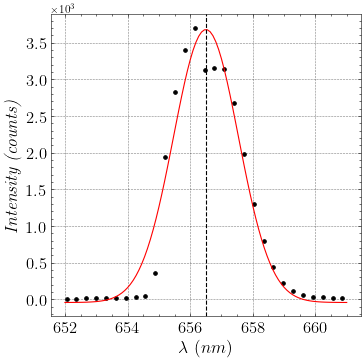

In [655]:
# FITTING DATA (RED LINE) --------------------------------------- 
x_min, x_max = 652, 661
a_est, b_est, c_est, d_est = 3500,656.2,1,25
df_study = df[(df['$\lambda \ (nm)$'] >= x_min) & (df['$\lambda \ (nm)$'] <= x_max)]
xdata, ydata, error_x, error_y = df_study['$\lambda \ (nm)$'], df_study['Intensity (counts)'], df_study['Uncertainty'], np.sqrt(df_study['Intensity (counts)'])
result = GaussianFit(xdata, ydata, 'red', '$\lambda \ (nm)$', 'Intensity (counts)', x_min, x_max, a_est, b_est, c_est, d_est)
#lambdas_inv.append(1/result[0]), errors.append(uncertainty_var([result[0]], [result[1]], lambda_inverse))
#lambdas.append(result)

Amplitude a =  3832.4585413881587  ±  295.7819860206006
Mean Lambda =  656.7035370716023  ±  0.05920117505103142
Standard Deviation sigma =  0.86673868858573  ±  0.03946768620628574


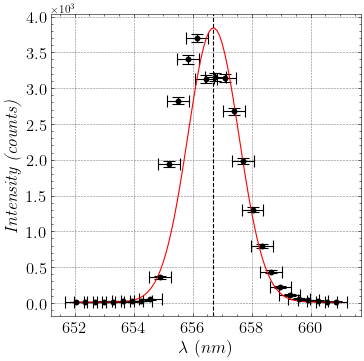

In [656]:
model = Model(GaussianODR)

data = RealData(xdata, ydata, error_x, error_y)
odr = ODR(data, model, [3500,656.2,1,25])
odr.set_job(fit_type=2) #Ordinary least squeares
output = odr.run()
a,b,c,d = output.beta[0], output.beta[1], output.beta[2], output.beta[3]
da, db, dc, dd = output.sd_beta[0], output.sd_beta[1], output.sd_beta[2], output.sd_beta[3]
#print(odr)
#Calculate the error on the fits from the std matrix
#print(output.beta)
#print(output.sd_beta)

print('Amplitude a = ', a, ' ± ', da)
print('Mean Lambda = ', b, ' ± ', db)
print('Standard Deviation sigma = ', c, ' ± ', dc)

#plt.plot(xdata, linearPlot(output.beta, xdata))
GaussianPlotODR(xdata, ydata, error_x, error_y, GaussianODR, output,'Red','$\lambda \ (nm)$', 'Intensity (counts)',x_min, x_max)
b, db = 10**(-9)*b, 10**(-9)*db
lambdas_inv.append(1/b), errors.append(uncertainty_var([b], [db], lambda_inverse))
lambdas.append([b,db])

In [657]:
# READING THE DATA FROM GOOGLE SHEETS ---------------------------------------
googleSheetId = '1RbLYnRVWaI9OWlUjq7lnrbepy-XmkaafO4fYj2lxBJ8'
workSheetName = '486.13'
URL = 'https://docs.google.com/spreadsheets/d/{0}/gviz/tq?tqx=out:csv&sheet={1}'.format(
    googleSheetId, workSheetName)
df = pd.read_csv(URL)
df = df.iloc[: , :3]
df

,$\lambda \ (nm)$,Intensity (counts),Uncertainty
0,188.723,3.61,-1.339343
1,189.086,4.61,-1.338592
2,189.449,4.61,-1.337841
3,189.812,2.61,-1.337089
4,190.175,3.61,-1.336338
...,...,...,...
2043,856.807,-1.39,0.043590
2044,857.087,-4.39,0.044170
2045,857.368,-1.39,0.044752
2046,857.648,-5.39,0.045331


Amplitude a =  3747.9265733026346  ±  184.9716863915914
Mean Lambda =  485.7183691514115  ±  0.04076253303424952
Standard Deviation sigma =  0.7533358227526918  ±  0.04697684926646207


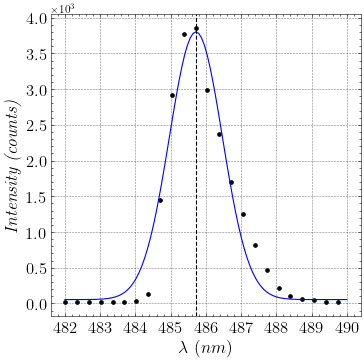

In [658]:
# FITTING DATA (BLUE-GREEN LINE) --------------------------------------- 
x_min, x_max = 482, 490
a_est, b_est, c_est, d_est = 4000,486.13,1,25
df_study = df[(df['$\lambda \ (nm)$'] >= x_min) & (df['$\lambda \ (nm)$'] <= x_max)]
xdata, ydata, error_x, error_y = df_study['$\lambda \ (nm)$'], df_study['Intensity (counts)'], df_study['Uncertainty'], np.sqrt(df_study['Intensity (counts)'])
result = GaussianFit(xdata, ydata, 'blue', '$\lambda \ (nm)$', 'Intensity (counts)', x_min, x_max, a_est, b_est, c_est, d_est)
#lambdas_inv.append(1/result[0]), errors.append(uncertainty_var([result[0]], [result[1]], lambda_inverse))
#lambdas.append(result)

Amplitude a =  3768.9215438866045  ±  385.64401466906526
Mean Lambda =  485.89266978073647  ±  0.06329700562822344
Standard Deviation sigma =  0.6863411936162271  ±  0.04351003355378066


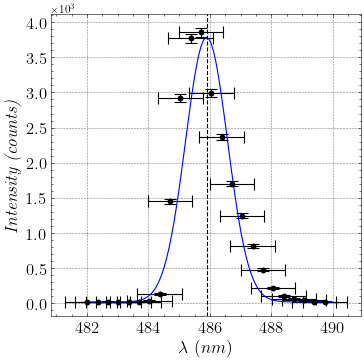

In [659]:
model = Model(GaussianODR)

data = RealData(xdata, ydata, error_x, error_y)
odr = ODR(data, model, [4000,486.13,1,25])
odr.set_job(fit_type=2) #Ordinary least squeares
output = odr.run()
a,b,c,d = output.beta[0], output.beta[1], output.beta[2], output.beta[3]
da, db, dc, dd = output.sd_beta[0], output.sd_beta[1], output.sd_beta[2], output.sd_beta[3]
#print(odr)
#Calculate the error on the fits from the std matrix
#print(output.beta)
#print(output.sd_beta)

print('Amplitude a = ', a, ' ± ', da)
print('Mean Lambda = ', b, ' ± ', db)
print('Standard Deviation sigma = ', c, ' ± ', dc)

#plt.plot(xdata, linearPlot(output.beta, xdata))
GaussianPlotODR(xdata, ydata, error_x, error_y, GaussianODR, output,'blue','$\lambda \ (nm)$', 'Intensity (counts)',x_min, x_max)
b, db = 10**(-9)*b, 10**(-9)*db
lambdas_inv.append(1/b), errors.append(uncertainty_var([b], [db], lambda_inverse))
lambdas.append([b,db])

In [660]:
# READING THE DATA FROM GOOGLE SHEETS ---------------------------------------
googleSheetId = '1RbLYnRVWaI9OWlUjq7lnrbepy-XmkaafO4fYj2lxBJ8'
workSheetName = '434.05'
URL = 'https://docs.google.com/spreadsheets/d/{0}/gviz/tq?tqx=out:csv&sheet={1}'.format(
    googleSheetId, workSheetName)
df = pd.read_csv(URL)
df = df.iloc[: , :3]
df

,$\lambda \ (nm)$,Intensity (counts),Uncertainty
0,188.723,1.67,-1.339343
1,189.086,2.67,-1.338592
2,189.449,1.67,-1.337841
3,189.812,2.67,-1.337089
4,190.175,1.67,-1.336338
...,...,...,...
2043,856.807,-1.33,0.043590
2044,857.087,-4.33,0.044170
2045,857.368,-7.33,0.044752
2046,857.648,-5.33,0.045331


Amplitude a =  1216.6680481019944  ±  51.71753841961102
Mean Lambda =  433.2443061392425  ±  0.022683548312237355
Standard Deviation sigma =  0.48441548389939565  ±  0.025816649721322076


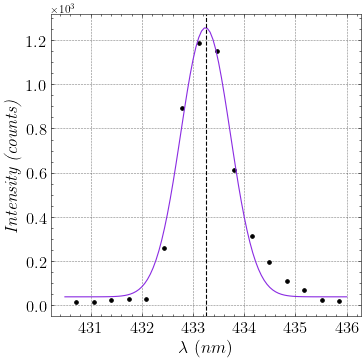

In [661]:
# FITTING DATA (BLUE-VIOLET LINE) --------------------------------------- 
x_min, x_max = 430.5, 436
a_est, b_est, c_est, d_est = 1200,434,1,25
df_study = df[(df['$\lambda \ (nm)$'] >= x_min) & (df['$\lambda \ (nm)$'] <= x_max)]
xdata, ydata, error_x, error_y = df_study['$\lambda \ (nm)$'], df_study['Intensity (counts)'], df_study['Uncertainty'], np.sqrt(df_study['Intensity (counts)'])
result = GaussianFit(xdata, ydata, 'blueviolet', '$\lambda \ (nm)$', 'Intensity (counts)', x_min, x_max, a_est, b_est, c_est, d_est)
#lambdas_inv.append(1/result[0]), errors.append(uncertainty_var([result[0]], [result[1]], lambda_inverse))
#lambdas.append(result)

Amplitude a =  1240.262911533958  ±  120.49048673049849
Mean Lambda =  433.29801142053213  ±  0.03947977666496481
Standard Deviation sigma =  0.47341738699871616  ±  0.03100898378932154


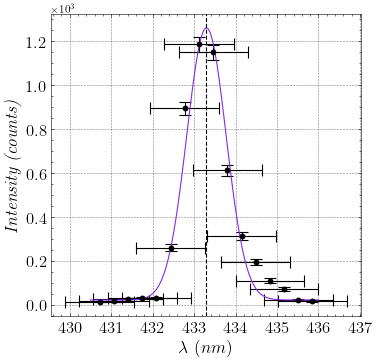

In [662]:
model = Model(GaussianODR)

data = RealData(xdata, ydata, error_x, error_y)
odr = ODR(data, model, [1200,434,1,25])
odr.set_job(fit_type=2) #Ordinary least squeares
output = odr.run()
a,b,c,d = output.beta[0], output.beta[1], output.beta[2], output.beta[3]
da, db, dc, dd = output.sd_beta[0], output.sd_beta[1], output.sd_beta[2], output.sd_beta[3]
#print(odr)
#Calculate the error on the fits from the std matrix
#print(output.beta)
#print(output.sd_beta)

print('Amplitude a = ', a, ' ± ', da)
print('Mean Lambda = ', b, ' ± ', db)
print('Standard Deviation sigma = ', c, ' ± ', dc)

#plt.plot(xdata, linearPlot(output.beta, xdata))
GaussianPlotODR(xdata, ydata, error_x, error_y, GaussianODR, output,'blueviolet','$\lambda \ (nm)$', 'Intensity (counts)',x_min, x_max)
b, db = 10**(-9)*b, 10**(-9)*db
lambdas_inv.append(1/b), errors.append(uncertainty_var([b], [db], lambda_inverse))
lambdas.append([b,db])

In [663]:
# READING THE DATA FROM GOOGLE SHEETS ---------------------------------------
googleSheetId = '1RbLYnRVWaI9OWlUjq7lnrbepy-XmkaafO4fYj2lxBJ8'
workSheetName = '410.17'
URL = 'https://docs.google.com/spreadsheets/d/{0}/gviz/tq?tqx=out:csv&sheet={1}'.format(
    googleSheetId, workSheetName)
df = pd.read_csv(URL)
df = df.iloc[: , :3]
df

,$\lambda \ (nm)$,Intensity (counts),Uncertainty
0,188.723,1.67,-1.339343
1,189.086,2.67,-1.338592
2,189.449,1.67,-1.337841
3,189.812,2.67,-1.337089
4,190.175,1.67,-1.336338
...,...,...,...
2043,856.807,-1.33,0.043590
2044,857.087,-4.33,0.044170
2045,857.368,-7.33,0.044752
2046,857.648,-5.33,0.045331


Amplitude a =  194.80602675867436  ±  9.3899940078866
Mean Lambda =  409.34939741425205  ±  0.027077312170736702
Standard Deviation sigma =  0.5305391326883012  ±  0.033877647860651006


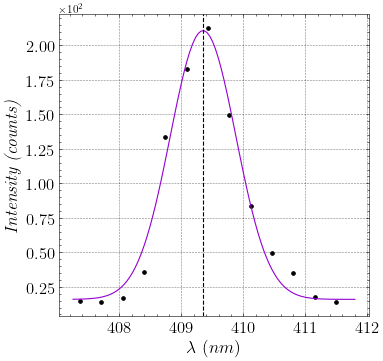

In [664]:
# FITTING DATA (VIOLET LINE 1) --------------------------------------- 
x_min, x_max = 407.25, 411.8
a_est, b_est, c_est, d_est = 200,410,1,25
df_study = df[(df['$\lambda \ (nm)$'] >= x_min) & (df['$\lambda \ (nm)$'] <= x_max)]
xdata, ydata, error_x, error_y = df_study['$\lambda \ (nm)$'], df_study['Intensity (counts)'], df_study['Uncertainty'], np.sqrt(df_study['Intensity (counts)'])
result = GaussianFit(xdata, ydata, 'darkviolet', '$\lambda \ (nm)$', 'Intensity (counts)', x_min, x_max, a_est, b_est, c_est, d_est)
#lambdas_inv.append(1/result[0]), errors.append(uncertainty_var([result[0]], [result[1]], lambda_inverse))
#lambdas.append(result)

Amplitude a =  195.99086076072604  ±  15.353176355906728
Mean Lambda =  409.39047065202385  ±  0.036185961822501785
Standard Deviation sigma =  0.522654947140067  ±  0.03478227358553071


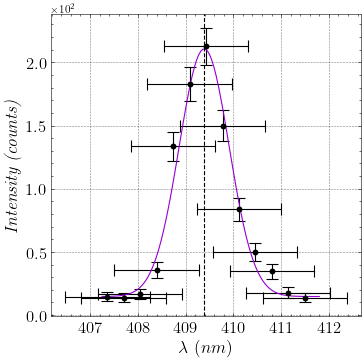

In [665]:
model = Model(GaussianODR)

data = RealData(xdata, ydata, error_x, error_y) 
odr = ODR(data, model, [200,410,1,25])
odr.set_job(fit_type=2) #Ordinary least squeares
output = odr.run()
a,b,c,d = output.beta[0], output.beta[1], output.beta[2], output.beta[3]
da, db, dc, dd = output.sd_beta[0], output.sd_beta[1], output.sd_beta[2], output.sd_beta[3]
#print(odr)
#Calculate the error on the fits from the std matrix
#print(output.beta)
#print(output.sd_beta)

print('Amplitude a = ', a, ' ± ', da)
print('Mean Lambda = ', b, ' ± ', db)
print('Standard Deviation sigma = ', c, ' ± ', dc)

#plt.plot(xdata, linearPlot(output.beta, xdata))
GaussianPlotODR(xdata, ydata, error_x, error_y, GaussianODR, output,'darkviolet','$\lambda \ (nm)$', 'Intensity (counts)',x_min, x_max)
b, db = 10**(-9)*b, 10**(-9)*db
lambdas_inv.append(1/b), errors.append(uncertainty_var([b], [db], lambda_inverse))
lambdas.append([b,db])

In [666]:
# READING THE DATA FROM GOOGLE SHEETS ---------------------------------------
googleSheetId = '1RbLYnRVWaI9OWlUjq7lnrbepy-XmkaafO4fYj2lxBJ8'
workSheetName = '397.01'
URL = 'https://docs.google.com/spreadsheets/d/{0}/gviz/tq?tqx=out:csv&sheet={1}'.format(
    googleSheetId, workSheetName)
df = pd.read_csv(URL)
df = df.iloc[: , :3]
df

,$\lambda \ (nm)$,Intensity (counts),Uncertainty
0,188.723,1.22,-1.339343
1,189.086,3.22,-1.338592
2,189.449,4.22,-1.337841
3,189.812,1.22,-1.337089
4,190.175,5.22,-1.336338
...,...,...,...
2043,856.807,-2.78,0.043590
2044,857.087,1.22,0.044170
2045,857.368,1.22,0.044752
2046,857.648,-3.78,0.045331


Amplitude a =  49.24919370925766  ±  6.058251895190271
Mean Lambda =  396.2397638176812  ±  0.06971371912887367
Standard Deviation sigma =  0.5361881873101195  ±  0.08750455590656478


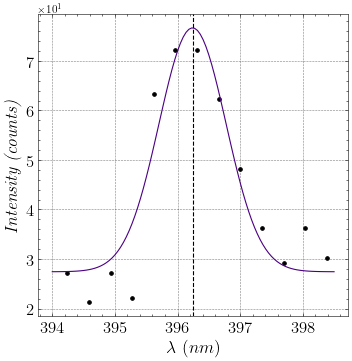

In [667]:
# FITTING DATA (VIOLET LINE 2) --------------------------------------- 
x_min, x_max =  394, 398.5
a_est, b_est, c_est, d_est = 200,397,1,25
df_study = df[(df['$\lambda \ (nm)$'] >= x_min) & (df['$\lambda \ (nm)$'] <= x_max)]
xdata, ydata, error_x, error_y = df_study['$\lambda \ (nm)$'], df_study['Intensity (counts)'], df_study['Uncertainty'], np.sqrt(df_study['Intensity (counts)'])
result = GaussianFit(xdata, ydata, 'indigo', '$\lambda \ (nm)$', 'Intensity (counts)', x_min, x_max, a_est, b_est, c_est, d_est)
#lambdas_inv.append(1/result[0]), errors.append(uncertainty_var([result[0]], [result[1]], lambda_inverse))

Amplitude a =  50.84579959711727  ±  8.208366681487552
Mean Lambda =  396.2924073010975  ±  0.08337364527777368
Standard Deviation sigma =  0.5067176904224946  ±  0.09056821664790106


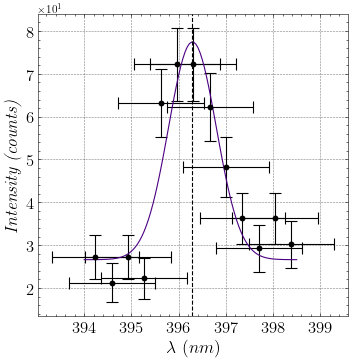

In [668]:
model = Model(GaussianODR)

data = RealData(xdata, ydata, error_x, error_y) 
odr = ODR(data, model, [200,397,1,25])
odr.set_job(fit_type=2) #Ordinary least squeares
output = odr.run()
a,b,c,d = output.beta[0], output.beta[1], output.beta[2], output.beta[3]
da, db, dc, dd = output.sd_beta[0], output.sd_beta[1], output.sd_beta[2], output.sd_beta[3]
#print(odr)
#Calculate the error on the fits from the std matrix
#print(output.beta)
#print(output.sd_beta)

print('Amplitude a = ', a, ' ± ', da)
print('Mean Lambda = ', b, ' ± ', db)
print('Standard Deviation sigma = ', c, ' ± ', dc)

#plt.plot(xdata, linearPlot(output.beta, xdata))
GaussianPlotODR(xdata, ydata, error_x, error_y, GaussianODR, output,'indigo','$\lambda \ (nm)$', 'Intensity (counts)',x_min, x_max)
b, db = 10**(-9)*b, 10**(-9)*db
lambdas_inv.append(1/b), errors.append(uncertainty_var([b], [db], lambda_inverse))
lambdas.append([b,db])

# FINDING THE RYDBERG CONSTANT USING THIS RESULTS ONLY

In [669]:
n = np.array([3,4,5,6,7])

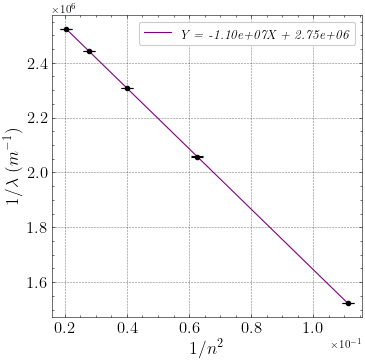

In [670]:
# GENERATING PLOT USING WEIGHTED AVERAGES DATA
xdata, ydata, error_y = 1/n**2, lambdas_inv, errors
parameters, covariance = opt.curve_fit(linear, xdata, ydata, sigma = error_y)
slope = parameters[0]
b = parameters[1]

#Calculate the error on the fits from the covariacne matrix
perr = np.sqrt(np.diag(covariance))
slope_error = perr[0]
b_error = perr[1]

# PLOTTING THE DATA ---------------------------------------
title = r'$\textbf{Deformation (m) vs Mass (Kg)}$'
LinearPlot(xdata,ydata,error_y,slope,b,title,linear,'$1/n^2$','$1/\lambda \ (m^{-1})$','purple')

In [671]:
slope = abs(slope) #CHECK INTERSECTION AS WELL
slope_theor = 1.096776*10**7
units = 'm-1'
print('Experimental Rydberg constant: (', slope, ' ± ', slope_error, ")", units)
print('Theoretical Rydberg constant: ' + "{:.4e}".format(slope_theor) + ' ' + units)

# DETERMING THE %ERROR
error = abs((slope-slope_theor)/slope_theor)*100
print("Percentage error: ", error, "%")
exp_precision = 100*slope_error/slope
print('Experimental precision:', exp_precision, '%')
print('Sigmas:', error/exp_precision)

Experimental Rydberg constant: ( 11037547.101941986  ±  6907.316449407503 ) m-1
Theoretical Rydberg constant: 1.0968e+07 m-1
Percentage error:  0.6362931167529742 %
Experimental precision: 0.06258017642517878 %
Sigmas: 10.167646579164408


# USING WEIGHTED AVERAGES

In [672]:
# FROM MANUAL GRATING SPECTROMETER
wavelengths = [6.524626974485137e-07, 4.912398425486479e-07, 4.3670934594570197e-07, 4.123696701e-07]
uncertainties = [.197264144594314e-10, 1.272365432939907e-10, 2.1889958383039714e-10, 3.3215618787888516e-10]
lambdas_Avg, lambdas_inv, errors = [], [], []
n = np.array([3,4,5,6])

In [673]:
lambdas

[[6.567035370716024e-07, 5.920117505103142e-11],
 [4.858926697807365e-07, 6.329700562822344e-11],
 [4.3329801142053215e-07, 3.947977666496481e-11],
 [4.093904706520239e-07, 3.618596182250179e-11],
 [3.9629240730109756e-07, 8.337364527777368e-11]]

In [674]:
# DEFINING A FUNCTION THAT RETURNS THE WEIGHTED AVERAGE WITH UNCERTAINTY
def weighted_avgs(values, deltas):
    weights = np.array(list(map(lambda x : 1/x**2, deltas)))
    best_val = np.dot(np.array(values), weights)/weights.sum()
    uncert = 1/np.sqrt(weights.sum())
    return [best_val, uncert]

In [675]:
# DETERMINING WEIGHTED AVERAGES
for x,y,z in zip(wavelengths, uncertainties, lambdas):
    lambdas_Avg.append(weighted_avgs([x,z[0]],[y,z[1]]))

In [676]:
lambdas_Avg

[[6.528864986511271e-07, 1.8714813121639415e-11],
 [4.869534678878302e-07, 5.6671684496205267e-11],
 [4.3340548009869604e-07, 3.8852926334501134e-11],
 [4.09425414526143e-07, 3.597311815809263e-11]]

In [677]:
# GETTING INVERSE LAMBDAS WITH UNCERTAINTIES
for result in lambdas_Avg:
    lambdas_inv.append(1/result[0]), errors.append(uncertainty_var([result[0]], [result[1]], lambda_inverse))

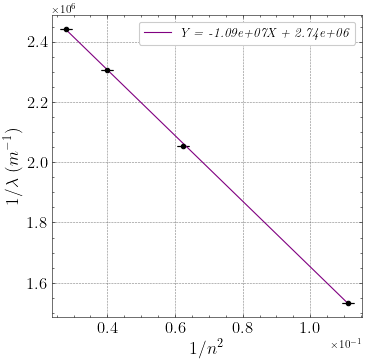

In [678]:
# GENERATING PLOT USING WEIGHTED AVERAGES DATA
xdata, ydata, error_y = 1/n**2, lambdas_inv, errors
parameters, covariance = opt.curve_fit(linear, xdata, ydata, sigma = error_y)
slope = parameters[0]
b = parameters[1]

#Calculate the error on the fits from the covariacne matrix
perr = np.sqrt(np.diag(covariance))
slope_error = perr[0]
b_error = perr[1]

# PLOTTING THE DATA ---------------------------------------
title = r'$\textbf{Deformation (m) vs Mass (Kg)}$'
LinearPlot(xdata,ydata,error_y,slope,b,title,linear,'$1/n^2$','$1/\lambda \ (m^{-1})$','purple')

In [679]:
slope = abs(slope)
slope_theor = 1.096776*10**7
units = 'm-1'
print('Experimental Rydberg constant: (', slope, ' ± ', slope_error, ")", units)
print('Theoretical Rydberg constant: ' + "{:.4e}".format(slope_theor) + ' ' + units)

# DETERMING THE %ERROR
error = abs((slope-slope_theor)/slope_theor)*100
print("Percentage error: ", error, "%")
exp_precision = 100*slope_error/slope
print('Experimental precision:', exp_precision, '%')
print('Sigmas:', error/exp_precision)

Experimental Rydberg constant: ( 10896847.687143987  ±  46984.265681995494 ) m-1
Theoretical Rydberg constant: 1.0968e+07 m-1
Percentage error:  0.6465523758362051 %
Experimental precision: 0.4311730055420262 %
Sigmas: 1.499519607039003


# Precission Trendline

In [512]:
# READING THE DATA FROM GOOGLE SHEETS ---------------------------------------
googleSheetId = '1RbLYnRVWaI9OWlUjq7lnrbepy-XmkaafO4fYj2lxBJ8'
workSheetName = 'Wavelengths'
URL = 'https://docs.google.com/spreadsheets/d/{0}/gviz/tq?tqx=out:csv&sheet={1}'.format(
    googleSheetId, workSheetName)
df = pd.read_csv(URL)
df = df.iloc[: , :4]
df

,Wavelength (nm),Intensity,Measured,Precision
0,438.793,W,437.905,-0.888
1,443.755,W,443.025,-0.730
2,447.148,S,446.434,-0.714
3,471.314,M,470.533,-0.781
4,492.193,M,491.425,-0.768
5,501.567,S,500.812,-0.755
6,587.562,S,587.145,-0.417
7,667.815,M,667.443,-0.372


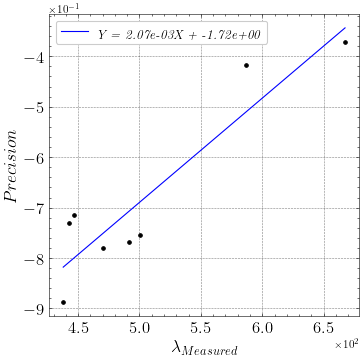

In [533]:
# GENERATING PLOT USING WEIGHTED AVERAGES DATA
xdata, ydata = df['Measured'], df['Precision']
parameters, covariance = opt.curve_fit(linear, xdata, ydata)
slope = parameters[0]
b = parameters[1]

#Calculate the error on the fits from the covariacne matrix
perr = np.sqrt(np.diag(covariance))
slope_error = perr[0]
b_error = perr[1]

# PLOTTING THE DATA ---------------------------------------
title = r'$\textbf{Deformation (m) vs Mass (Kg)}$'
LinearPlot2(xdata,ydata,0,slope,b,title,linear,'$\lambda_{Measured}$','$Precision$','blue')